In [1]:
###Importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
###Reading the data
price_data = pd.read_csv('price_data.csv')
client_data = pd.read_csv('client_data.csv')

In [3]:
###checking for null values
def check_null_values(df) -> list:
    df = df.copy()
    null_list = [features for features in df.columns if df[features].isnull().sum() != 0]
    return null_list

In [4]:
price_null_list = check_null_values(price_data)
client_null_list = check_null_values(client_data)

In [5]:
print('Count of null values in price list is', len(price_null_list), 'and they are: ', price_null_list)
print('Count of null values in client list is', len(client_null_list), 'and they are: ',client_null_list)

Count of null values in price list is 0 and they are:  []
Count of null values in client list is 0 and they are:  []


In [6]:
price_data.head(6)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0


In [7]:
client_data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,24011ae4ebbe3035111d65fa7c15bc57,d29c2c54acc38ff3c0614d0a653813dd,764c75f661154dac3a6c254cd082ea7d,bba03439a292a1e166f80264c16191cb,149d57cf92fc41cf94415803a877cb4b,1aa498825382410b098937d65c4ec26d,7ab4bf4878d8f7661dfc20e9b8e18011,01495c955be7ec5e7f3203406785aae0,f53a254b1115634330c12c7fdbf7958a,10c1b2f97a2d2a6f10299dc213d1a370,d5e512dbc8118a830a7b8c7f61d89992,6ee77a019251bcc304c88167e0dfcb4c,2c05848e1a577dd041ea6804bbf5bbf5,21860c2ff2d5df75503b230ce629c253,c5037389dd8be351d3c40f2973da2391
channel_sales,foosdfpfkusacimwkcsosbicdxkicaua,MISSING,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,MISSING,usilxuppasemubllopkaafesmlibmsdf,foosdfpfkusacimwkcsosbicdxkicaua,foosdfpfkusacimwkcsosbicdxkicaua,usilxuppasemubllopkaafesmlibmsdf,lmkebamcaaclubfxadlmueccxoimlema,usilxuppasemubllopkaafesmlibmsdf,foosdfpfkusacimwkcsosbicdxkicaua,foosdfpfkusacimwkcsosbicdxkicaua,foosdfpfkusacimwkcsosbicdxkicaua,MISSING
cons_12m,0,4660,544,1584,4425,8302,45097,29552,2962,26064,10831,4442,46121,7726,9707
cons_gas_12m,54946,0,0,0,0,0,0,0,0,0,0,0,1542867,0,0
cons_last_month,0,0,0,0,526,1998,0,1260,0,2188,3112,2489,5280,0,0
date_activ,2013-06-15,2009-08-21,2010-04-16,2010-03-30,2010-01-13,2011-12-09,2011-12-02,2010-04-21,2011-09-23,2010-05-04,2011-07-11,2009-11-26,2011-09-01,2013-01-22,2010-12-01
date_end,2016-06-15,2016-08-30,2016-04-16,2016-03-30,2016-03-07,2016-12-09,2016-12-02,2016-04-21,2016-09-23,2016-05-04,2016-07-11,2016-11-26,2016-10-30,2017-01-22,2016-12-01
date_modif_prod,2015-11-01,2009-08-21,2010-04-16,2010-03-30,2010-01-13,2015-11-01,2011-12-02,2010-04-21,2011-09-23,2015-04-29,2011-07-11,2009-11-26,2013-10-30,2015-11-18,2010-12-01
date_renewal,2015-06-23,2015-08-31,2015-04-17,2015-03-31,2015-03-09,2015-12-10,2015-12-03,2015-04-22,2015-09-25,2015-05-05,2015-07-12,2015-11-27,2015-11-01,2016-01-24,2015-12-02
forecast_cons_12m,0,189.95,47.96,240.04,445.75,796.94,8069.28,864.73,444.38,2738.1,1204.58,561.96,4502.43,914.1,1028.52


In [8]:

print('This is price data info: ')
print('')
price_data.info()
print('-'*40)
print('This is client data info')
print('')
client_data.info()

This is price data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
id                    193002 non-null object
price_date            193002 non-null object
price_off_peak_var    193002 non-null float64
price_peak_var        193002 non-null float64
price_mid_peak_var    193002 non-null float64
price_off_peak_fix    193002 non-null float64
price_peak_fix        193002 non-null float64
price_mid_peak_fix    193002 non-null float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB
----------------------------------------
This is client data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
id                                14606 non-null object
channel_sales                     14606 non-null object
cons_12m                          14606 non-null int64
cons_gas_12m                      14606 non-null int64
cons_last_month                   14606 non-nu

[]

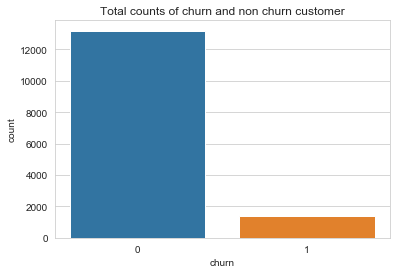

In [9]:
sns.countplot(client_data['churn'])
plt.title('Total counts of churn and non churn customer')
plt.plot()

In [10]:
##Getting churn to retention ratio
print('Total percentage of churned customers is',np.round(client_data['churn'].sum()/len(client_data) * 100,2),'%')

Total percentage of churned customers is 9.72 %


In [11]:
#To check the Id consists of unique values only
client_data.describe(include='O')

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
count,14606,14606,14606,14606,14606,14606,14606,14606
unique,14606,8,1796,368,2129,386,2,6
top,43b6b1d7781ecf07f8d52961b29f1d15,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,95,145,721,587,11955,7097


In [12]:
##checking the numerical data present in the client data
numerical_values = [var for var in client_data.columns if client_data[var].dtype!='O']
client_data[numerical_values].head(10)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,1,47.98,6,19.800,0
5,8302,0,1998,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,181.21,33.12,33.12,1,118.89,4,13.200,1
6,45097,0,0,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,0.00,4.04,4.04,1,346.63,4,15.000,1
7,29552,0,1260,864.73,751,0.0,144.49,0.115174,0.098837,40.606701,70.63,53.92,53.92,1,100.09,6,26.400,0
8,2962,0,0,444.38,0,0.0,15.85,0.145711,0.000000,44.311378,0.00,12.82,12.82,1,42.59,4,13.200,0
9,26064,0,2188,2738.10,2188,0.0,130.43,0.115761,0.099419,40.606701,219.59,33.42,33.42,1,329.60,6,31.500,0


In [13]:
def display_numerical_distribution(df, num_list):
    for features in num_list:
        plt.hist(df[features],bins=20,stacked=False)
        plt.title(f'Distribution of {features}')
        plt.show()
        

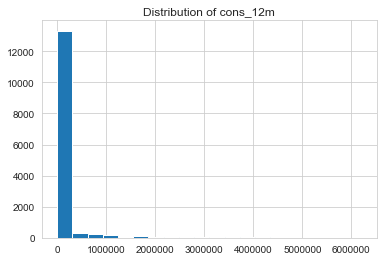

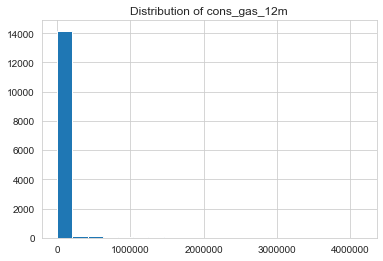

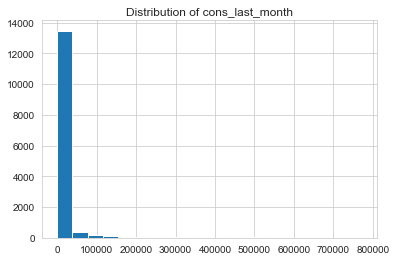

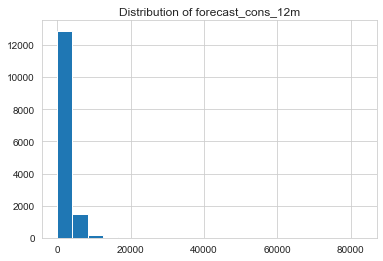

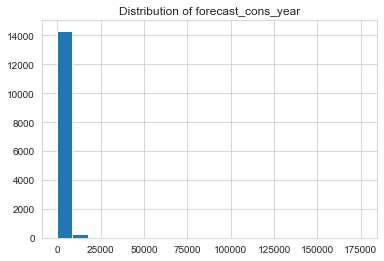

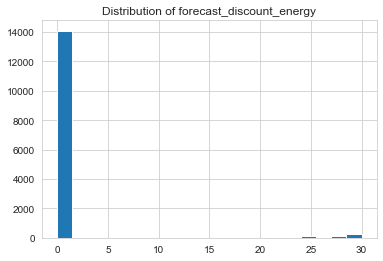

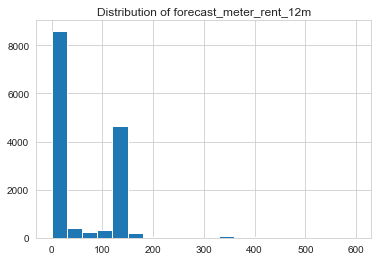

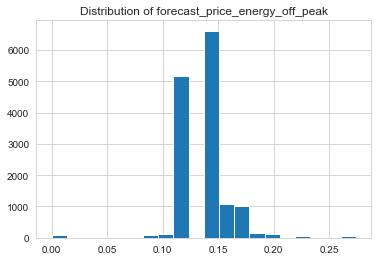

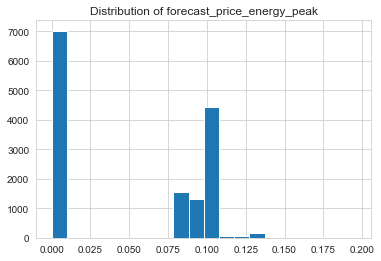

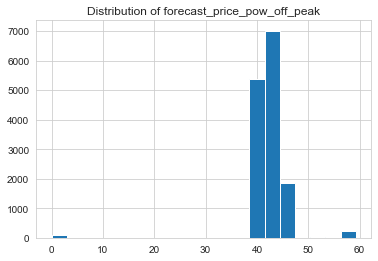

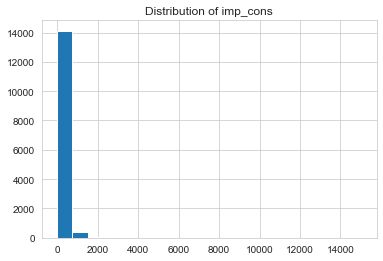

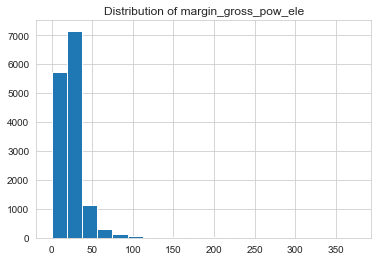

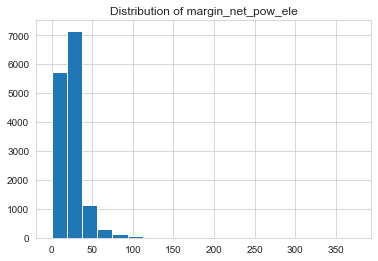

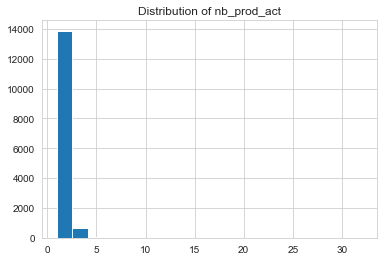

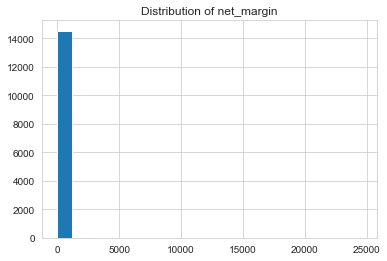

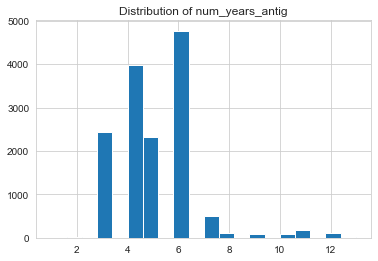

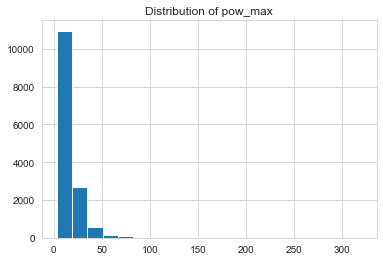

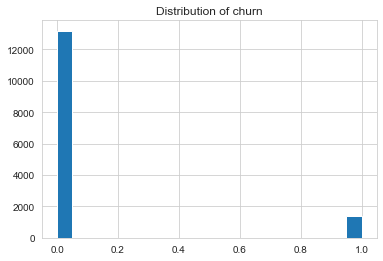

In [14]:
display_numerical_distribution(client_data, numerical_values)

### It appears most of the numerical distribution are skewed and It affects some of the models prediction

In [15]:
##checking the categorical data present in the client data
categorical_values = [var for var in client_data.columns if client_data[var].dtype=='O']
client_data[categorical_values].head(15)

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
4,149d57cf92fc41cf94415803a877cb4b,MISSING,2010-01-13,2016-03-07,2010-01-13,2015-03-09,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,2011-12-09,2016-12-09,2015-11-01,2015-12-10,f,lxidpiddsbxsbosboudacockeimpuepw
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,2011-12-02,2016-12-02,2011-12-02,2015-12-03,f,lxidpiddsbxsbosboudacockeimpuepw
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-21,2016-04-21,2010-04-21,2015-04-22,f,lxidpiddsbxsbosboudacockeimpuepw
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2011-09-23,2016-09-23,2011-09-23,2015-09-25,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,2010-05-04,2016-05-04,2015-04-29,2015-05-05,f,lxidpiddsbxsbosboudacockeimpuepw


In [16]:
categorical_values

['id',
 'channel_sales',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'has_gas',
 'origin_up']

In [17]:
def show_categorical_distributuion(df,cat_list):
    for features in cat_list:
        if features not in ['date_activ','date_end','date_modif_prod','date_renewal','id']:
            sns.countplot(df[features])
            plt.title(f'Distribution of {features}')
            plt.xticks(rotation=75)
            plt.show()
        else:
            pass

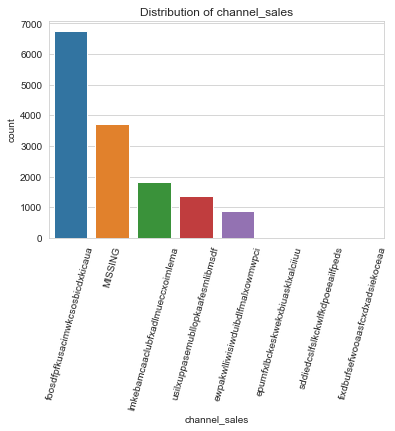

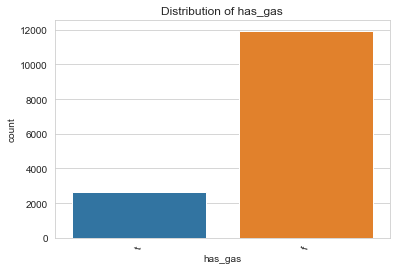

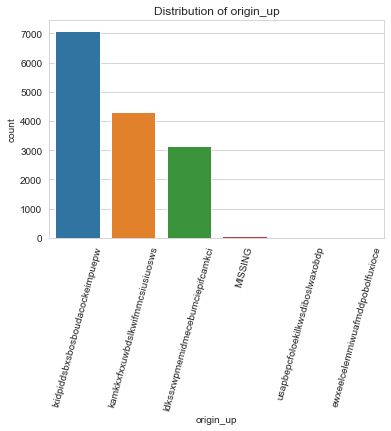

In [18]:
show_categorical_distributuion(client_data,categorical_values)

Assumming t=True and f = False, It shows higher percentage of customers are only electricity clients

In [19]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [20]:
client_data.head().T

,0,1,2,3,4
id,24011ae4ebbe3035111d65fa7c15bc57,d29c2c54acc38ff3c0614d0a653813dd,764c75f661154dac3a6c254cd082ea7d,bba03439a292a1e166f80264c16191cb,149d57cf92fc41cf94415803a877cb4b
channel_sales,foosdfpfkusacimwkcsosbicdxkicaua,MISSING,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,MISSING
cons_12m,0,4660,544,1584,4425
cons_gas_12m,54946,0,0,0,0
cons_last_month,0,0,0,0,526
date_activ,2013-06-15,2009-08-21,2010-04-16,2010-03-30,2010-01-13
date_end,2016-06-15,2016-08-30,2016-04-16,2016-03-30,2016-03-07
date_modif_prod,2015-11-01,2009-08-21,2010-04-16,2010-03-30,2010-01-13
date_renewal,2015-06-23,2015-08-31,2015-04-17,2015-03-31,2015-03-09
forecast_cons_12m,0,189.95,47.96,240.04,445.75


In [21]:
#Exploring the datetime in client data
#From the categorical table of client data we have some data time values.
#Converting those values to date time so as info from them.
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'])
client_data['date_end'] = pd.to_datetime(client_data['date_end'])
client_data['date_modif_prod'] = pd.to_datetime(client_data['date_modif_prod'])
client_data['date_renewal'] = pd.to_datetime(client_data['date_renewal'])

In [22]:
client_data['date_activ'].min()

Timestamp('2003-05-09 00:00:00')

In [23]:
client_data['date_activ'].max()

Timestamp('2014-09-01 00:00:00')

In [24]:
client_data['date_end'].min()

Timestamp('2016-01-28 00:00:00')

In [25]:
client_data['date_end'].max()

Timestamp('2017-06-13 00:00:00')

### Checking the number of customers who churned over the months

In [26]:
def createListofTotalMonths(df, month):
    month_map = {1:13,2:14,3:15,4:16,5:17,6:18,7:19,8:20,9:21,10:22,11:23,12:24}
    df = df.copy()
    df['years_months'] = 0
    df['years_months'] = np.where(df[month].apply(lambda x:x.year)==2017, df[month].apply(lambda x: x.month).map(month_map), df[month].apply(lambda x: x.month))
    return df

In [27]:
client_data = createListofTotalMonths(client_data, 'date_end')

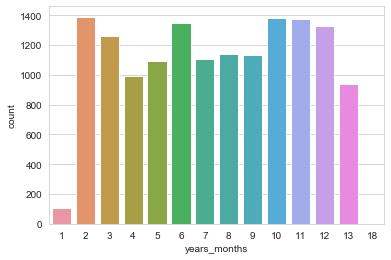

In [28]:
sns.countplot(client_data['years_months'])

In [29]:
churned_months = client_data.groupby(by='years_months')['churn'].agg(['sum'])
list(churned_months['sum'].values)

[11, 149, 124, 94, 108, 143, 89, 111, 98, 139, 143, 109, 101, 0]

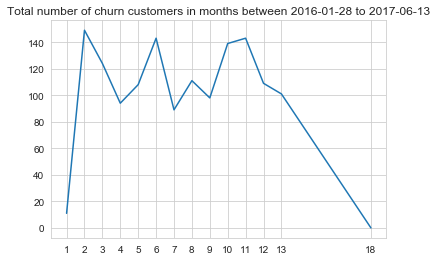

In [30]:
churned_months = client_data.groupby(by='years_months')['churn'].agg(['sum'])
plt.plot(list(churned_months['sum'].index), list(churned_months['sum'].values))
plt.xticks(list(churned_months['sum'].index))
plt.title('Total number of churn customers in months between 2016-01-28 to 2017-06-13')
plt.show()

##### shows the total  number of customers that churned between the months of 2016 and 2017

In [31]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [32]:
merged_set = pd.merge(price_data, client_data, on='id', how='right')

In [33]:
merged_set.tail(25)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,years_months
175124,d00da2c0c568614b9937791f681cd7d7,2015-12-01,0.146788,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,35943,...,179.67,16.92,16.92,1,94.02,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175125,045f94f0b7f538a8d8fae11080abb5da,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175126,045f94f0b7f538a8d8fae11080abb5da,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175127,045f94f0b7f538a8d8fae11080abb5da,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175128,045f94f0b7f538a8d8fae11080abb5da,2015-04-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175129,045f94f0b7f538a8d8fae11080abb5da,2015-05-01,0.148465,0.000000,0.000000,44.266930,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175130,045f94f0b7f538a8d8fae11080abb5da,2015-06-01,0.148465,0.000000,0.000000,44.266930,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175131,045f94f0b7f538a8d8fae11080abb5da,2015-07-01,0.149160,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175132,045f94f0b7f538a8d8fae11080abb5da,2015-08-01,0.144698,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6
175133,045f94f0b7f538a8d8fae11080abb5da,2015-09-01,0.144698,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,0.00,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6


In [34]:
#converting price_date to datetime
merged_set['price_date'] = pd.to_datetime(merged_set['price_date'])

In [35]:
print('Minimum price date',merged_set['price_date'].min())
print()
print('Maximum price date', merged_set['price_date'].max())

Minimum price date 2015-01-01 00:00:00

Maximum price date 2015-12-01 00:00:00


In [36]:
merged_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 34 columns):
id                                175149 non-null object
price_date                        175149 non-null datetime64[ns]
price_off_peak_var                175149 non-null float64
price_peak_var                    175149 non-null float64
price_mid_peak_var                175149 non-null float64
price_off_peak_fix                175149 non-null float64
price_peak_fix                    175149 non-null float64
price_mid_peak_fix                175149 non-null float64
channel_sales                     175149 non-null object
cons_12m                          175149 non-null int64
cons_gas_12m                      175149 non-null int64
cons_last_month                   175149 non-null int64
date_activ                        175149 non-null datetime64[ns]
date_end                          175149 non-null datetime64[ns]
date_modif_prod                   175149 non-null datetime64[ns]

In [37]:
#creating a new variable to get the months of price date
merged_set['price_months'] = merged_set['price_date'].apply(lambda x : x.month)

In [38]:
merged_set.tail(15)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,years_months,price_months
175134,045f94f0b7f538a8d8fae11080abb5da,2015-10-01,0.144698,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6,10
175135,045f94f0b7f538a8d8fae11080abb5da,2015-11-01,0.144698,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6,11
175136,045f94f0b7f538a8d8fae11080abb5da,2015-12-01,0.144698,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,81661,...,16.92,16.92,1,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,6,12
175137,16f51cdc2baa19af0b940ee1b3dd17d5,2015-01-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,13.80,13.80,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.100,0,18,1
175138,16f51cdc2baa19af0b940ee1b3dd17d5,2015-02-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,13.80,13.80,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.100,0,18,2
175139,16f51cdc2baa19af0b940ee1b3dd17d5,2015-03-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,13.80,13.80,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.100,0,18,3
175140,16f51cdc2baa19af0b940ee1b3dd17d5,2015-04-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,13.80,13.80,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.100,0,18,4
175141,16f51cdc2baa19af0b940ee1b3dd17d5,2015-05-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,13.80,13.80,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.100,0,18,5
175142,16f51cdc2baa19af0b940ee1b3dd17d5,2015-06-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,13.80,13.80,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.100,0,18,6
175143,16f51cdc2baa19af0b940ee1b3dd17d5,2015-07-01,0.128077,0.106401,0.076311,40.728885,24.437330,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,13.80,13.80,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.100,0,18,7


In [39]:
price_frame  = merged_set.groupby(by='price_months')[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']].agg(['sum'])

In [40]:
columns_name = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']

In [41]:
aggregated_list = price_frame.values.tolist()

In [42]:
aggregated_frame = pd.DataFrame(aggregated_list, columns = columns_name)

In [43]:
price_frame = pd.concat([aggregated_frame, pd.DataFrame({'months':price_frame.index.tolist()})],axis=1)

In [44]:
price_frame.columns.tolist()

['price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix',
 'months']

In [45]:
def plot_price_change(df):
    for columns in df.columns.tolist():
        if columns!='months':
            plt.plot(df['months'],df[columns],label=columns)
            plt.xticks(price_frame['months'])
            plt.title(f'Graph of {columns} against months')
            plt.show()

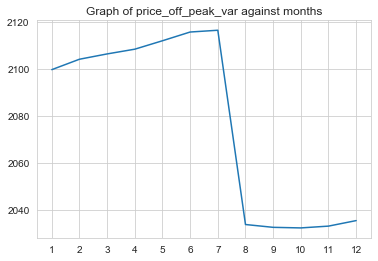

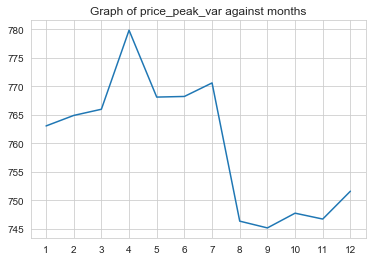

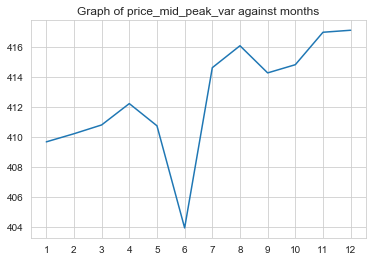

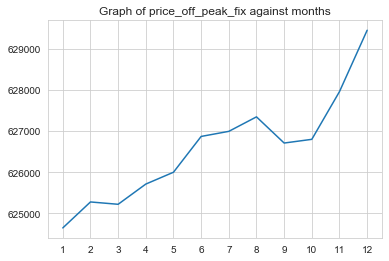

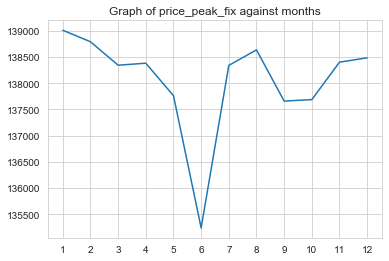

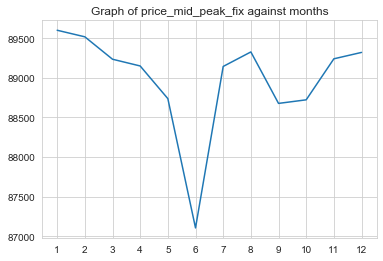

In [46]:
plot_price_change(price_frame)

##### plotting the trends of prices of energy and power against price_date

### Taking into consideration price and churn customers

In [48]:
merged_set['total_energy'] = merged_set['price_off_peak_var'] + merged_set['price_peak_var'] + merged_set['price_mid_peak_var']
merged_set['total_power'] = merged_set['price_off_peak_fix'] + merged_set['price_peak_fix'] + merged_set['price_mid_peak_fix']

In [49]:
merged_set.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,years_months,price_months,total_energy,total_power
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,1,0.151367,44.266931
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,2,0.151367,44.266931
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,3,0.151367,44.266931
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,4,0.149626,44.266931
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,5,0.149626,44.266931


In [50]:
price_data.head(25)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


###### Grouping the 'total energy' and 'total power' variables into bins

(array([1.3000e+03, 1.0000e+00, 2.1221e+04, 5.9617e+04, 2.8460e+03,
        3.8417e+04, 4.9241e+04, 1.2750e+03, 1.2160e+03, 1.5000e+01]),
 array([0.       , 0.0489579, 0.0979158, 0.1468737, 0.1958316, 0.2447895,
        0.2937474, 0.3427053, 0.3916632, 0.4406211, 0.489579 ]),
 <a list of 10 Patch objects>)

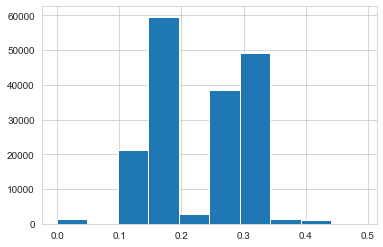

In [51]:
plt.hist(merged_set['total_energy'],bins=10)

(array([1.31500e+03, 1.00000e+00, 0.00000e+00, 4.20000e+01, 1.06473e+05,
        5.83000e+02, 0.00000e+00, 6.41790e+04, 2.28000e+02, 2.32800e+03]),
 array([  0.       ,  10.4031888,  20.8063776,  31.2095664,  41.6127552,
         52.015944 ,  62.4191328,  72.8223216,  83.2255104,  93.6286992,
        104.031888 ]),
 <a list of 10 Patch objects>)

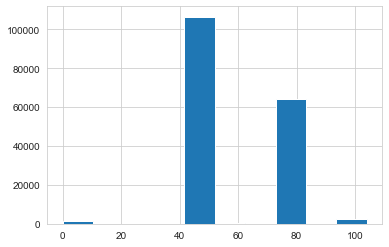

In [52]:
plt.hist(merged_set['total_power'],bins=10)

In [53]:
merged_set['loced_power'] = 0
merged_set['loced_power'].loc[(merged_set['total_power']<=10.4031888)] =1 
merged_set['loced_power'].loc[(merged_set['total_power']>10.4031888) & (merged_set['total_power']<=20.8063776)] = 2
merged_set['loced_power'].loc[(merged_set['total_power']>20.8063776) & (merged_set['total_power']<=31.2095664)] = 3
merged_set['loced_power'].loc[(merged_set['total_power']>31.2095664) & (merged_set['total_power']<=41.6127552)] = 4
merged_set['loced_power'].loc[(merged_set['total_power']>41.6127552) & (merged_set['total_power']<=52.015944)] = 5
merged_set['loced_power'].loc[(merged_set['total_power']>52.015944) & (merged_set['total_power']<=62.4191328)] = 6
merged_set['loced_power'].loc[(merged_set['total_power']>62.4191328) & (merged_set['total_power']<=72.8223216)] = 7
merged_set['loced_power'].loc[(merged_set['total_power']>72.8223216) & (merged_set['total_power']<=83.2255104)] = 8
merged_set['loced_power'].loc[(merged_set['total_power']>83.2255104) & (merged_set['total_power']<=93.6286992)] = 9
merged_set['loced_power'].loc[(merged_set['total_power']>93.6286992)] =10

C:\Users\kolade\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
power_plot = merged_set.groupby(by=['loced_power'])['churn'].agg(['sum'])

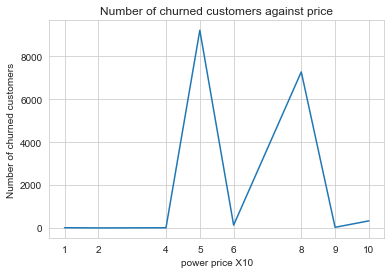

In [55]:
plt.plot(power_plot.index.tolist(), power_plot['sum'].values.tolist())
plt.xticks(power_plot.index.tolist())
plt.ylabel('Number of churned customers')
plt.xlabel('power price X10')
plt.title('Number of churned customers against price')
plt.show()

In [56]:
merged_set['loced_energy'] = 0
merged_set['loced_energy'].loc[(merged_set['total_energy']<=0.0489579)] =1
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.0489579) & (merged_set['total_energy']<= 0.0979158)] = 2
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.0979158) & (merged_set['total_energy']<= 0.1468737)] = 3
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.1468737) & (merged_set['total_energy']<= 0.1958316)] = 4
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.1958316) & (merged_set['total_energy']<= 0.2447895)] = 5
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.2447895) & (merged_set['total_energy']<= 0.2937474)] = 6
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.2937474) & (merged_set['total_energy']<= 0.3427053)] = 7
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.3427053) & (merged_set['total_energy']<= 0.3916632)] = 8
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.3916632) & (merged_set['total_energy']<= 0.4406211)] = 9
merged_set['loced_energy'].loc[(merged_set['total_energy']> 0.4406211)] = 10

In [57]:
energy_plot = merged_set.groupby(by='loced_energy')['churn'].agg(['sum'])

In [58]:
energy_plot

,sum
loced_energy,
1,13
2,0
3,1998
4,5247
5,341
6,3533
7,5538
8,161
9,172


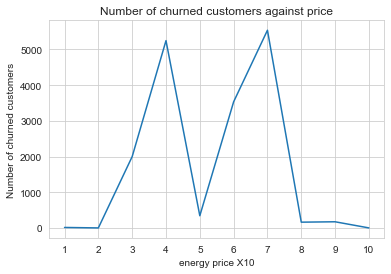

In [59]:
plt.plot(energy_plot.index.tolist(), energy_plot['sum'].values.tolist())
plt.xticks(energy_plot.index.tolist())
plt.ylabel('Number of churned customers')
plt.xlabel('energy price X10')
plt.title('Number of churned customers against price')
plt.show()

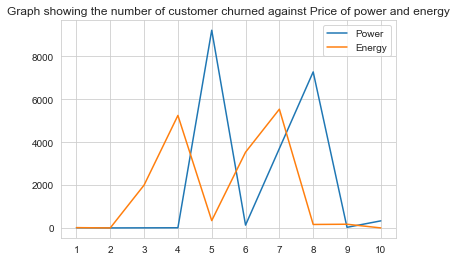

In [60]:
plt.plot(power_plot.index.tolist(), power_plot['sum'].values.tolist(),label='Power')
plt.plot(energy_plot.index.tolist(), energy_plot['sum'].values.tolist(),label='Energy')
plt.xticks(energy_plot.index.tolist())
plt.title('Graph showing the number of customer churned against Price of power and energy')
plt.legend()
plt.show()

In [61]:
merged_set.head(15)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,num_years_antig,origin_up,pow_max,churn,years_months,price_months,total_energy,total_power,loced_power,loced_energy
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,1,0.151367,44.266931,5,4
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,2,0.151367,44.266931,5,4
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,3,0.151367,44.266931,5,4
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,4,0.149626,44.266931,5,4
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,5,0.149626,44.266931,5,4
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,6,0.149626,44.266930,5,4
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,7,0.150321,44.444710,5,4
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,8,0.145859,44.444710,5,3
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,9,0.145859,44.444710,5,3
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,6,10,0.145859,44.444710,5,3


In [62]:
years_with_energy_and_churn = merged_set.groupby(by='years_months')['loced_energy','loced_power','churn'].agg(['sum'])

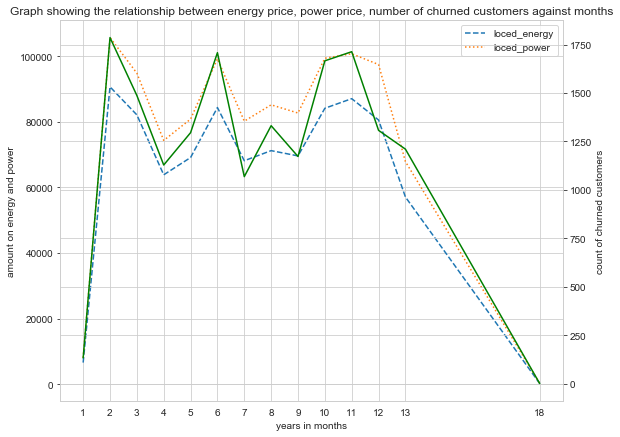

In [63]:
fig, ax = plt.subplots(figsize=[9, 7])
ax.plot(years_with_energy_and_churn.index.tolist(),years_with_energy_and_churn.values[:,0],label='loced_energy',linestyle='dashed')
ax.plot(years_with_energy_and_churn.index.tolist(),years_with_energy_and_churn.values[:,1],label='loced_power',linestyle='dotted')
plt.ylabel('amount on energy and power')
plt.xlabel('years in months')
ax.legend()
ax2 = ax.twinx()
ax2.plot(years_with_energy_and_churn.index.tolist(),years_with_energy_and_churn.values[:,2],label='churn_count',color='g')
plt.xticks(years_with_energy_and_churn.index.tolist())
plt.title('Graph showing the relationship between energy price, power price, number of churned customers against months')
plt.ylabel('count of churned customers')
plt.show()